# Merging Pluto and Census data with HPD data.
In this notebook, we merge the processed HPD data with the PLUTO and census data. We will merge the HPD and PLUTO data first, using BBL as a merge key. Then we will merge this set with the census, using BoroughID and census tract as keys.

In [400]:
import pandas as pd
from get_clean_pluto_bbl_data import *
import re

pluto = get_clean_pluto_data()
hpd = pd.read_csv('data/merged_complaints_problems_violations.csv')

merged_hpd_pluto = pd.merge(pluto, hpd, on='BBL', how='inner')
merged_hpd_pluto.head(10)

,UnitsRes,AssessTot,YearBuilt,BBL,CT2010,YearLastAlter,Avg_value_per_res_unit,Unnamed: 0,ProblemID,ComplaintID,...,MajorCategoryID,MinorCategoryID,CodeID,StatusDate,StatusDescriptionID,BoroughID,ReceivedDate,Tot_A_violations,Tot_B_violations,Tot_C_violations
0,8,104219,1920,2022600018,001900,2009,13027.375,576554,15420728,7449790,...,59,348,2713,2015-04-30,5,2,2015-04-28,1,0,4
1,8,104219,1920,2022600018,001900,2009,13027.375,576555,15420727,7449789,...,59,349,2716,2015-04-30,5,2,2015-04-28,1,0,4
2,12,347400,1925,2022610045,001900,0,28950.000,52509,14826627,7093640,...,59,349,2715,2014-11-14,5,2,2014-11-13,1,1,0
3,12,347400,1925,2022610045,001900,0,28950.000,52510,14840680,7102832,...,63,375,2817,2014-11-23,3,2,2014-11-16,1,1,0
4,12,347400,1925,2022610045,001900,0,28950.000,52511,14857610,7113444,...,59,349,2715,2014-11-25,5,2,2014-11-19,1,1,0
5,12,347400,1925,2022610045,001900,0,28950.000,52512,14840673,7102825,...,59,348,2713,2014-11-18,5,2,2014-11-16,1,1,0
6,12,347400,1925,2022610045,001900,0,28950.000,52513,14851339,7109491,...,59,349,2715,2014-11-25,2,2,2014-11-19,1,1,0
7,12,347400,1925,2022610045,001900,0,28950.000,52514,14826553,7093574,...,59,348,2713,2014-11-14,1,2,2014-11-13,1,1,0
8,12,347400,1925,2022610045,001900,0,28950.000,52515,14887600,7131459,...,59,349,2715,2014-12-03,5,2,2014-11-29,1,1,0
9,12,347400,1925,2022610045,001900,0,28950.000,52516,14839403,7101877,...,59,349,2715,2014-11-18,5,2,2014-11-16,1,1,0


In [401]:
merged_hpd_pluto.shape

(624196, 23)

In [402]:
merged_hpd_pluto.columns

Index([u'UnitsRes', u'AssessTot', u'YearBuilt', u'BBL', u'CT2010',
       u'YearLastAlter', u'Avg_value_per_res_unit', u'Unnamed: 0',
       u'ProblemID', u'ComplaintID', u'UnitTypeID', u'SpaceTypeID', u'TypeID',
       u'MajorCategoryID', u'MinorCategoryID', u'CodeID', u'StatusDate',
       u'StatusDescriptionID', u'BoroughID', u'ReceivedDate',
       u'Tot_A_violations', u'Tot_B_violations', u'Tot_C_violations'],
      dtype='object')

Note the index of from hpd has been added as a feature to the merged dataset (as evidenced by the fact it has 624196 unique values in a dataframe with 624196 rows), so we'll drop it before proceeding.

In [403]:
len(merged_hpd_pluto['Unnamed: 0'].unique())

624196

In [404]:
merged_hpd_pluto = merged_hpd_pluto.drop('Unnamed: 0', axis=1)

Next we need to determine the number of problems associated with a complaint.

In [407]:
grouped = merged_hpd_pluto.ComplaintID.value_counts()

In [408]:
grouped

7346424    42
7495556    34
7418747    33
7351916    30
7340743    30
7422063    30
7547554    30
7379333    29
7463393    29
7563365    28
7402832    28
7403042    27
7394100    27
7171794    26
7489363    25
7340657    25
7139122    25
7564092    25
7340591    25
7330236    24
7346129    24
7330171    24
7454635    24
7287783    24
7528623    23
7433267    23
7509038    23
7561489    23
7414395    23
7174579    23
           ..
7678884     1
7595784     1
7678894     1
7678896     1
7678900     1
7678903     1
7678906     1
7126901     1
7678909     1
7678911     1
7678870     1
7678863     1
7678834     1
7678862     1
7678836     1
7678837     1
7678838     1
7678839     1
7678841     1
7678842     1
7678844     1
7678845     1
7678846     1
7678851     1
7678854     1
7678855     1
7678857     1
7678858     1
7595788     1
7340032     1
dtype: int64

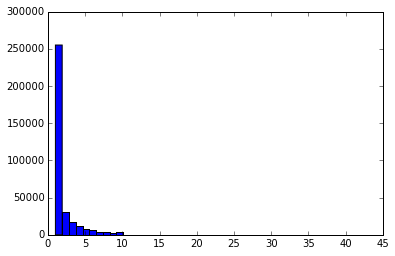

In [411]:
plt.figure()
probs = plt.hist(grouped.values, bins=45)
plt.show()

In [414]:
grouped.name = 'Probs_in_complaint'

In [415]:
merged_hpd_pluto.set_index('ComplaintID', inplace=True)
merged_hpd_pluto.head(6)

,UnitsRes,AssessTot,YearBuilt,BBL,CT2010,YearLastAlter,Avg_value_per_res_unit,ProblemID,UnitTypeID,SpaceTypeID,...,MajorCategoryID,MinorCategoryID,CodeID,StatusDate,StatusDescriptionID,BoroughID,ReceivedDate,Tot_A_violations,Tot_B_violations,Tot_C_violations
ComplaintID,,,,,,,,,,,,,,,,,,,,,
7449790,8,104219,1920,2022600018,001900,2009,13027.375,15420728,91,543,...,59,348,2713,2015-04-30,5,2,2015-04-28,1,0,4
7449789,8,104219,1920,2022600018,001900,2009,13027.375,15420727,92,550,...,59,349,2716,2015-04-30,5,2,2015-04-28,1,0,4
7093640,12,347400,1925,2022610045,001900,0,28950.000,14826627,92,550,...,59,349,2715,2014-11-14,5,2,2014-11-13,1,1,0
7102832,12,347400,1925,2022610045,001900,0,28950.000,14840680,91,541,...,63,375,2817,2014-11-23,3,2,2014-11-16,1,1,0
7113444,12,347400,1925,2022610045,001900,0,28950.000,14857610,92,550,...,59,349,2715,2014-11-25,5,2,2014-11-19,1,1,0
7102825,12,347400,1925,2022610045,001900,0,28950.000,14840673,91,543,...,59,348,2713,2014-11-18,5,2,2014-11-16,1,1,0


In [416]:
grouped

7346424    42
7495556    34
7418747    33
7351916    30
7340743    30
7422063    30
7547554    30
7379333    29
7463393    29
7563365    28
7402832    28
7403042    27
7394100    27
7171794    26
7489363    25
7340657    25
7139122    25
7564092    25
7340591    25
7330236    24
7346129    24
7330171    24
7454635    24
7287783    24
7528623    23
7433267    23
7509038    23
7561489    23
7414395    23
7174579    23
           ..
7678884     1
7595784     1
7678894     1
7678896     1
7678900     1
7678903     1
7678906     1
7126901     1
7678909     1
7678911     1
7678870     1
7678863     1
7678834     1
7678862     1
7678836     1
7678837     1
7678838     1
7678839     1
7678841     1
7678842     1
7678844     1
7678845     1
7678846     1
7678851     1
7678854     1
7678855     1
7678857     1
7678858     1
7595788     1
7340032     1
Name: Probs_in_complaint, dtype: int64

In [418]:
merged_hpd_pluto = merged_hpd_pluto.join(grouped, how='inner')

In [420]:
merged_hpd_pluto.shape

(624196, 22)

In [421]:
merged_hpd_pluto.reset_index(inplace=True, drop=True)
merged_hpd_pluto.head(6)

,UnitsRes,AssessTot,YearBuilt,BBL,CT2010,YearLastAlter,Avg_value_per_res_unit,ProblemID,UnitTypeID,SpaceTypeID,...,MinorCategoryID,CodeID,StatusDate,StatusDescriptionID,BoroughID,ReceivedDate,Tot_A_violations,Tot_B_violations,Tot_C_violations,Probs_in_complaint
0,2,153900,1910,4092050044,012800,0,76950.000000,14790192,92,550,...,349,2716,2014-11-06,5,4,2014-11-01,0,0,0,1
1,4,107707,1930,2048310055,040800,0,26926.750000,14790193,92,550,...,349,2715,2014-11-06,1,2,2014-11-01,2,11,39,1
2,23,607500,1923,3039120058,117202,0,26413.043478,14790194,91,543,...,348,2713,2014-11-07,1,3,2014-11-01,0,0,0,1
3,54,942750,1927,2045120001,034000,0,17458.333333,14790195,92,550,...,349,2715,2014-11-03,5,2,2014-11-01,0,0,0,1
4,54,601200,1910,2028510014,023301,0,11133.333333,14790196,92,550,...,349,2715,2014-11-06,5,2,2014-11-01,0,0,3,1
5,63,927450,1921,2032160048,024502,0,14721.428571,14790197,92,550,...,349,2715,2014-11-07,1,2,2014-11-01,0,3,0,1


In [422]:
from get_income_data_from_census import *
income = get_clean_income_data()

merged_pluto_hpd_census = pd.merge(income, merged_hpd_pluto, on=['CT2010','BoroughID'], how='inner')

In [423]:
merged_pluto_hpd_census.head(7)

,Median_income,State,CT2010,BoroughID,UnitsRes,AssessTot,YearBuilt,BBL,YearLastAlter,Avg_value_per_res_unit,...,MajorCategoryID,MinorCategoryID,CodeID,StatusDate,StatusDescriptionID,ReceivedDate,Tot_A_violations,Tot_B_violations,Tot_C_violations,Probs_in_complaint
0,69514,36,000200,2,3,31800,1970,2034920064,0,10600,...,59,348,2713,2014-11-10,5,2014-11-02,2,14,5,1
1,69514,36,000200,2,2,26040,2002,2034430024,0,13020,...,59,348,2713,2014-11-13,2,2014-11-05,1,0,1,2
2,69514,36,000200,2,2,26040,2002,2034430024,0,13020,...,9,68,644,2014-11-13,3,2014-11-05,1,0,1,2
3,69514,36,000200,2,3,17280,1975,2034930055,2003,5760,...,59,348,2713,2014-11-10,1,2014-11-07,0,0,0,1
4,69514,36,000200,2,3,17280,1975,2034930055,2003,5760,...,59,348,2713,2014-11-10,5,2014-11-08,0,0,0,1
5,69514,36,000200,2,2,26040,2002,2034430024,0,13020,...,59,348,2713,2014-11-13,5,2014-11-10,1,0,1,1
6,69514,36,000200,2,2,26040,2002,2034430024,0,13020,...,63,376,2821,2014-12-17,3,2014-11-10,1,0,1,1


In [424]:
print merged_pluto_hpd_census.shape

(624196, 24)


In [425]:
print merged_pluto_hpd_census.StatusDescriptionID.value_counts()

2    192813
5    180398
1    119666
3    116418
4     14874
8        27
dtype: int64


Thus, in our dataset, we've got 116418 violations (plus 27 Section 8 violations) of 624196 total observations.

In [426]:
merged_pluto_hpd_census.columns

Index([u'Median_income', u'State', u'CT2010', u'BoroughID', u'UnitsRes',
       u'AssessTot', u'YearBuilt', u'BBL', u'YearLastAlter',
       u'Avg_value_per_res_unit', u'ProblemID', u'UnitTypeID', u'SpaceTypeID',
       u'TypeID', u'MajorCategoryID', u'MinorCategoryID', u'CodeID',
       u'StatusDate', u'StatusDescriptionID', u'ReceivedDate',
       u'Tot_A_violations', u'Tot_B_violations', u'Tot_C_violations',
       u'Probs_in_complaint'],
      dtype='object')

Now, we drop features that we anticipate are non-informative.

In [427]:
merged_pluto_hpd_census = merged_pluto_hpd_census.drop(['State','CT2010','ProblemID','BBL', 'StatusDate'],axis=1)
merged_pluto_hpd_census.shape

(624196, 19)

In [428]:
merged_pluto_hpd_census.columns

Index([u'Median_income', u'BoroughID', u'UnitsRes', u'AssessTot', u'YearBuilt',
       u'YearLastAlter', u'Avg_value_per_res_unit', u'UnitTypeID',
       u'SpaceTypeID', u'TypeID', u'MajorCategoryID', u'MinorCategoryID',
       u'CodeID', u'StatusDescriptionID', u'ReceivedDate', u'Tot_A_violations',
       u'Tot_B_violations', u'Tot_C_violations', u'Probs_in_complaint'],
      dtype='object')

Now, let's see if it has any missing values:

In [429]:
merged_pluto_hpd_census.isnull().any(axis=1).sum()

35

It looks like we still have 35 records with missing values- since they represent an insignificant fraction of our total dataset, we drop it.

In [430]:
merged_pluto_hpd_census = merged_pluto_hpd_census[~(merged_pluto_hpd_census.isnull().any(axis=1))]

In [431]:
merged_pluto_hpd_census.shape

(624161, 19)

In [432]:
merged_pluto_hpd_census.head(5)

,Median_income,BoroughID,UnitsRes,AssessTot,YearBuilt,YearLastAlter,Avg_value_per_res_unit,UnitTypeID,SpaceTypeID,TypeID,MajorCategoryID,MinorCategoryID,CodeID,StatusDescriptionID,ReceivedDate,Tot_A_violations,Tot_B_violations,Tot_C_violations,Probs_in_complaint
0,69514,2,3,31800,1970,0,10600,91,543,1,59,348,2713,5,2014-11-02,2,14,5,1
1,69514,2,2,26040,2002,0,13020,91,543,1,59,348,2713,2,2014-11-05,1,0,1,2
2,69514,2,2,26040,2002,0,13020,91,541,3,9,68,644,3,2014-11-05,1,0,1,2
3,69514,2,3,17280,1975,2003,5760,91,543,1,59,348,2713,1,2014-11-07,0,0,0,1
4,69514,2,3,17280,1975,2003,5760,91,543,1,59,348,2713,5,2014-11-08,0,0,0,1


In [438]:
merged_pluto_hpd_census['ReceivedDate'] = pd.to_datetime(merged_pluto_hpd_census['ReceivedDate'].values)
merged_pluto_hpd_census['Month'] = merged_pluto_hpd_census['ReceivedDate'].map(lambda x: x.month)
merged_pluto_hpd_census = merged_pluto_hpd_census.drop('ReceivedDate', axis=1)

Now, before we finish, we have a couple more tasks to finish cleaning the data:
1. It makes more sense to specify the age of the building in years (i.e. 100 years old) instead of as a calendar year. Similarly, for records with YearLastAlter is 0, we should set YearLastAlter = YearBuilt.
2. We need to make the following dummy variables:
  - Month
  - BoroughID
  - UnitTypeID
  - SpaceTypeID
  - TypeID
  - MajorCategoryID
  - MinorCategoryID
  - CodeID


In [439]:
merged_pluto_hpd_census['BuildingAge'] = 2015 - merged_pluto_hpd_census['YearBuilt']
merged_pluto_hpd_census['YearSinceLastAlter'] = 2015 - merged_pluto_hpd_census['YearLastAlter']
merged_pluto_hpd_census = merged_pluto_hpd_census.drop(['YearBuilt', 'YearLastAlter'],axis=1)

In [440]:
merged_pluto_hpd_census.head(6)

,Median_income,BoroughID,UnitsRes,AssessTot,Avg_value_per_res_unit,UnitTypeID,SpaceTypeID,TypeID,MajorCategoryID,MinorCategoryID,CodeID,StatusDescriptionID,Tot_A_violations,Tot_B_violations,Tot_C_violations,Probs_in_complaint,Month,BuildingAge,YearSinceLastAlter
0,69514,2,3,31800,10600,91,543,1,59,348,2713,5,2,14,5,1,11,45,2015
1,69514,2,2,26040,13020,91,543,1,59,348,2713,2,1,0,1,2,11,13,2015
2,69514,2,2,26040,13020,91,541,3,9,68,644,3,1,0,1,2,11,13,2015
3,69514,2,3,17280,5760,91,543,1,59,348,2713,1,0,0,0,1,11,40,12
4,69514,2,3,17280,5760,91,543,1,59,348,2713,5,0,0,0,1,11,40,12
5,69514,2,2,26040,13020,91,543,1,59,348,2713,5,1,0,1,1,11,13,2015


In [441]:
mask = (merged_pluto_hpd_census['YearSinceLastAlter'] == 2015)
merged_pluto_hpd_census.loc[mask,'YearSinceLastAlter'] = merged_pluto_hpd_census['BuildingAge']

In [442]:
print merged_pluto_hpd_census.head(6)

  Median_income  BoroughID  UnitsRes  AssessTot  Avg_value_per_res_unit  \
0         69514          2         3      31800                   10600   
1         69514          2         2      26040                   13020   
2         69514          2         2      26040                   13020   
3         69514          2         3      17280                    5760   
4         69514          2         3      17280                    5760   
5         69514          2         2      26040                   13020   

   UnitTypeID  SpaceTypeID  TypeID  MajorCategoryID  MinorCategoryID  CodeID  \
0          91          543       1               59              348    2713   
1          91          543       1               59              348    2713   
2          91          541       3                9               68     644   
3          91          543       1               59              348    2713   
4          91          543       1               59              348    27

In [443]:
print merged_pluto_hpd_census.describe()

           BoroughID       UnitsRes     AssessTot  Avg_value_per_res_unit  \
count  624161.000000  624161.000000  6.241610e+05           624161.000000   
mean        2.419457      84.526047  2.211712e+06            23259.877098   
std         1.003179     415.401937  1.524833e+07            58451.743830   
min         1.000000       1.000000  0.000000e+00                0.000000   
25%         2.000000       8.000000  1.110160e+05            12504.545455   
50%         2.000000      31.000000  6.187500e+05            17314.285714   
75%         3.000000      63.000000  1.327050e+06            24350.000000   
max         5.000000   10914.000000  5.694651e+08         14307300.000000   

          UnitTypeID    SpaceTypeID         TypeID  MajorCategoryID  \
count  624161.000000  624161.000000  624161.000000    624161.000000   
mean       91.351552     546.260982       1.797935        45.549220   
std         0.601366       6.086821       1.036696        21.386807   
min        91.000000  

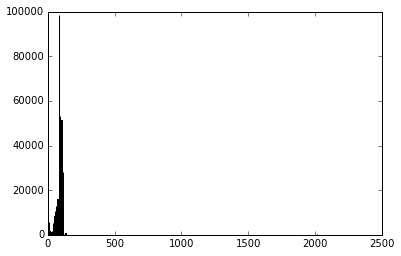

In [444]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
age = plt.hist(merged_pluto_hpd_census.BuildingAge, bins=1000)
plt.show()

In [445]:
merged_pluto_hpd_census[merged_pluto_hpd_census.BuildingAge > 300].shape

(170, 19)

Now we drop these records with missing building ages (i.e. the year the building was built was recorded as '0', so BuildingAge = 2015 - 0 is 2015.)

In [446]:
merged_pluto_hpd_census = merged_pluto_hpd_census[merged_pluto_hpd_census.BuildingAge < 300]

In [447]:
merged_pluto_hpd_census.shape

(623991, 19)

In [448]:
print merged_pluto_hpd_census.describe()

           BoroughID       UnitsRes     AssessTot  Avg_value_per_res_unit  \
count  623991.000000  623991.000000  6.239910e+05           623991.000000   
mean        2.419394      84.529485  2.212111e+06            23261.551227   
std         1.003166     415.456469  1.525030e+07            58457.210844   
min         1.000000       1.000000  0.000000e+00                0.000000   
25%         2.000000       8.000000  1.110160e+05            12507.800000   
50%         2.000000      31.000000  6.192000e+05            17318.181818   
75%         3.000000      63.000000  1.327050e+06            24350.000000   
max         5.000000   10914.000000  5.694651e+08         14307300.000000   

          UnitTypeID    SpaceTypeID         TypeID  MajorCategoryID  \
count  623991.000000  623991.000000  623991.000000    623991.000000   
mean       91.351503     546.260723       1.797963        45.549040   
std         0.601320       6.086574       1.036693        21.386718   
min        91.000000  

In [449]:
def make_dummy_variables(dataframe, feature):
    uniques_drop_1 = dataframe[feature].unique()[:-1]
    dummies = pd.get_dummies(dataframe[dataframe[feature].isin(uniques_drop_1)][feature])
    colnames = ['{}_{}'.format(str(feature), str(int(x))) for x in uniques_drop_1]
    dummies.columns = colnames
    return dummies

def drop_minor_classes_for_feature(dataframe, feature, min_num_obs=500):
    important_classes = dataframe[feature].value_counts()
    important_classes = important_classes[important_classes > min_num_obs]
    dataframe[feature] = dataframe[feature].map(lambda x: x if (int(x) in important_classes) else 0)
    return dataframe

def clean_categorical_vars(dataframe, list_of_cat_vars):
    for var in list_of_cat_vars:
        drop_minor_classes_for_feature(dataframe, var)
        dummies = make_dummy_variables(dataframe, var)
        dataframe = pd.concat([dataframe, dummies], axis=1)
        dataframe = dataframe.drop(var, axis=1)
    return dataframe

In [450]:
cat_vars = ['BoroughID','UnitTypeID','SpaceTypeID','TypeID','MajorCategoryID','MinorCategoryID','CodeID','Month']
cleaned_df = clean_categorical_vars(merged_pluto_hpd_census, cat_vars)

In [451]:
cleaned_df.shape

(623991, 215)

In [452]:
cleaned_df.loc[:,'StatusDescriptionID'] = cleaned_df['StatusDescriptionID'].map(lambda x: 1 if (x == 3 or x == 8) else 0)

In [453]:
cleaned_df.describe()

,UnitsRes,AssessTot,Avg_value_per_res_unit,StatusDescriptionID,Tot_A_violations,Tot_B_violations,Tot_C_violations,Probs_in_complaint,BuildingAge,YearSinceLastAlter,...,Month_12,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9
count,623991.000000,6.239910e+05,623991.000000,623991.000000,623991.000000,623991.000000,623991.000000,623991.000000,623991.00000,623991.000000,...,582774.000000,582774.000000,582774.000000,582774.000000,582774.000000,582774.000000,582774.000000,582774.000000,582774.000000,582774.000000
mean,84.529485,2.212111e+06,23261.551227,0.186565,7.051377,22.173563,5.312902,3.745293,83.92144,65.620305,...,0.134445,0.096905,0.077404,0.059807,0.065851,0.069634,0.067402,0.066789,0.120935,0.108224
std,415.456469,1.525030e+07,58457.210844,0.389562,16.659661,48.847955,11.074922,3.372609,22.93418,32.935102,...,0.341130,0.295829,0.267232,0.237129,0.248021,0.254530,0.250717,0.249657,0.326052,0.310663
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,1.110160e+05,12507.800000,0.000000,0.000000,0.000000,0.000000,1.000000,80.00000,30.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,31.000000,6.192000e+05,17318.181818,0.000000,1.000000,4.000000,1.000000,2.000000,88.00000,84.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,63.000000,1.327050e+06,24350.000000,0.000000,7.000000,23.000000,6.000000,6.000000,95.00000,90.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10914.000000,5.694651e+08,14307300.000000,1.000000,303.000000,896.000000,151.000000,42.000000,215.00000,215.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [454]:
merged_pluto_hpd_census.to_csv('data/merged_hpd_census_pluto.csv')